# Topic Modeling  

# Imports

In [35]:
import random

import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

%load_ext blackcellmagic

# Data Ingest

In [5]:
df = pd.read_csv("data/news_corpus.csv")
df.shape

(142570, 10)

### Sample of Documents  
I took a sample of the documents to speed up the code. Even with 5000 documents, it runs rather slow.

In [31]:
data = df.c_content.values.tolist()

# Take sample to speed up code
data = random.sample(data, 5000)
print(len(data))

5000


# Pre-Process  

### Clean Text  
My corpus is already cleaned, this step just splits on whitespace

In [32]:
def sent_to_words(docs: list):
    for doc in docs:
        yield(str(doc).split(" "))

dw = list(sent_to_words(data))

### Create Bigram and Trigram Models

In [33]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(dw, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[dw], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[dw[0]]])

['house_intelligence_committee', 'leadership', 'republican', 'rep', 'devin_nunes', 'made', 'least', 'unmasking', 'requests', 'us', 'spy_agencies', 'related', 'russia', 'election', 'meddling', 'june', 'friday', 'nunes', 'would', 'sign', 'committee', 'requests', 'reveal', 'identities', 'us', 'persons', 'mentioned', 'intelligence', 'reports', 'called', 'unmaskings', 'obama_administration', 'officials', 'requested', 'unmasking', 'trump', 'associates', 'last_year', 'reports', 'suggested', 'trump', 'advisers', 'like', 'michael_flynn', 'carter', 'page', 'either', 'mentioned', 'directly', 'involved', 'surveilled', 'conversations', 'russian', 'officials', 'election', 'obvious', 'motive', 'aide', 'said', 'adding', 'democrats', 'feel', 'nunes', 'gone', 'rogue', 'trying', 'undermine', 'committee', 'longer', 'serves', 'top', 'position', 'investigation', 'schiff', 'criticized', 'nunes', 'saturday', 'calling', 'decision', 'issue', 'subpoenas', 'violation', 'nunes', 'recusal', 'investigation', 'nunes'

### Make Bigrams and Lemmatize

In [37]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]


def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]


def lemmatization(texts, allowed_postags=["NOUN", "ADJ", "VERB", "ADV"]):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append(
            [token.lemma_ for token in doc if token.pos_ in allowed_postags]
        )
    return texts_out

In [39]:
# Form Bigrams
data_words_bigrams = make_bigrams(dw)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[0])

['leadership', 'make', 'least', 'unmasking', 'request', 'relate', 'election', 'meddle', 'would', 'sign', 'committee', 'request', 'reveal', 'identity', 'person', 'mention', 'intelligence', 'report', 'call', 'administration', 'official', 'request', 'unmasking', 'trump', 'associate', 'last', 'year', 'report', 'suggest', 'trump', 'adviser', 'page', 'mention', 'directly', 'involve', 'surveilled', 'conversation', 'russian', 'official', 'election', 'obvious', 'motive', 'aide', 'say', 'add', 'feel', 'nune', 'go', 'rogue', 'try', 'undermine', 'longer', 'serve', 'top', 'position', 'investigation', 'criticize', 'call', 'decision', 'issue', 'subpoena', 'step', 'aside', 'early', 'bypass', 'member', 'month', 'classify', 'intelligence', 'say', 'show', 'trump', 'incidentally', 'surveille', 'election', 'nune', 'go', 'able', 'go', 'democratic', 'aide', 'say', 'add', 'would', 'pressure', 'remove', 'nune', 'chairman', 'american', 'people', 'watch', 'aide', 'add', 'house']


### Create Dictionary and Corpus for Topic Modeling

In [40]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[0])

[(0, 1), (1, 3), (2, 1), (3, 1), (4, 3), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 3), (20, 1), (21, 3), (22, 1), (23, 1), (24, 1), (25, 2), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 2), (37, 1), (38, 1), (39, 3), (40, 1), (41, 2), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 2), (50, 3), (51, 1), (52, 1), (53, 1), (54, 3), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 3), (65, 1), (66, 1), (67, 2), (68, 1), (69, 2), (70, 1)]


# Topic Modeling

In [42]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(
    corpus=corpus,
    id2word=id2word,
    num_topics=20,
    random_state=100,
    update_every=1,
    chunksize=100,
    passes=10,
    alpha="auto",
    per_word_topics=True,
)

### View Topics

In [43]:
# Print the Keyword in the 20 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.052*"correct" + 0.045*"portion" + 0.042*"taste" + 0.041*"demonstration" + '
  '0.035*"petition" + 0.020*"adventure" + 0.019*"tailor" + 0.018*"prime" + '
  '0.018*"introduction" + 0.017*"cooking"'),
 (1,
  '0.041*"company" + 0.038*"percent" + 0.032*"say" + 0.021*"market" + '
  '0.016*"year" + 0.016*"business" + 0.014*"price" + 0.010*"firm" + '
  '0.010*"money" + 0.010*"sale"'),
 (2,
  '0.025*"twitter" + 0.024*"user" + 0.021*"video" + 0.021*"news" + 0.019*"use" '
  '+ 0.015*"post" + 0.015*"internet" + 0.014*"online" + 0.014*"story" + '
  '0.014*"show"'),
 (3,
  '0.026*"case" + 0.023*"report" + 0.021*"email" + 0.019*"court" + '
  '0.018*"investigation" + 0.017*"official" + 0.015*"lawyer" + 0.014*"former" '
  '+ 0.013*"document" + 0.013*"information"'),
 (4,
  '0.025*"drug" + 0.025*"study" + 0.018*"find" + 0.015*"use" + 0.015*"health" '
  '+ 0.014*"research" + 0.013*"test" + 0.013*"researcher" + 0.012*"death" + '
  '0.011*"patient"'),
 (5,
  '0.075*"jewish" + 0.054*"israeli" + 0.

### Model Perplexity & Coherence Score

In [44]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -10.806877313030329

Coherence Score:  0.47330455837747654


# LDA Mallet Model

In [48]:
# Download File: run steps in this order (only once)
# cd data
# wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
# unzip mallet-2.0.8.zip

mallet_path = 'data/mallet-2.0.8/bin/mallet' # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)

In [50]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(
    model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence="c_v"
)
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print("\nCoherence Score: ", coherence_ldamallet)

[(2,
  [('country', 0.022051581927859165),
   ('political', 0.018281423119537118),
   ('american', 0.018266034716237844),
   ('power', 0.012464606672411671),
   ('world', 0.011171980795272683),
   ('nation', 0.01091037793918503),
   ('leave', 0.010248676597316262),
   ('deal', 0.008355902991505602),
   ('make', 0.007247937953957897),
   ('economic', 0.007078665517665887)]),
 (15,
  [('people', 0.02893169997262524),
   ('student', 0.0227039419655078),
   ('school', 0.020223104297837392),
   ('black', 0.018529290993703804),
   ('white', 0.014440186148371201),
   ('community', 0.014371749247194088),
   ('work', 0.010813030385984123),
   ('live', 0.009889132220093074),
   ('group', 0.009581166164796057),
   ('young', 0.009067889405967698)]),
 (11,
  [('attack', 0.034147617890585576),
   ('group', 0.019830663701100874),
   ('force', 0.019456852886754014),
   ('people', 0.01594303123189354),
   ('fight', 0.014485169055940788),
   ('kill', 0.01424219202661533),
   ('government', 0.01328897445

### Find Optimal Number of Topics

In [52]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(
            mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word
        )
        model_list.append(model)
        coherencemodel = CoherenceModel(
            model=model, texts=texts, dictionary=dictionary, coherence="c_v"
        )
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [54]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(
    dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6
)

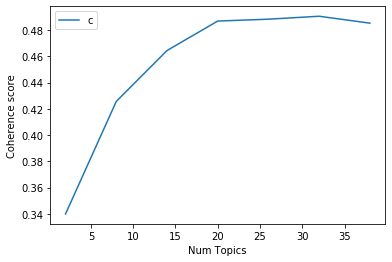

In [56]:
# Show graph
limit = 40
start = 2
step = 6
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc="best")
plt.show()

In [57]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3399
Num Topics = 8  has Coherence Value of 0.4257
Num Topics = 14  has Coherence Value of 0.4645
Num Topics = 20  has Coherence Value of 0.4869
Num Topics = 26  has Coherence Value of 0.4884
Num Topics = 32  has Coherence Value of 0.4906
Num Topics = 38  has Coherence Value of 0.4853


In [58]:
# Select the model and print the topics
optimal_model = model_list[5]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(23,
  '0.223*"trump" + 0.049*"campaign" + 0.028*"president" + 0.017*"speech" + '
  '0.017*"presidential" + 0.016*"debate" + 0.013*"election" + 0.012*"make" + '
  '0.012*"candidate" + 0.010*"support"'),
 (12,
  '0.032*"people" + 0.022*"black" + 0.018*"white" + 0.012*"group" + '
  '0.012*"american" + 0.011*"political" + 0.011*"movement" + 0.010*"community" '
  '+ 0.009*"conservative" + 0.008*"liberal"'),
 (10,
  '0.029*"news" + 0.022*"twitter" + 0.022*"post" + 0.020*"story" + '
  '0.020*"video" + 0.019*"medium" + 0.013*"user" + 0.012*"network" + '
  '0.012*"ad" + 0.012*"online"'),
 (30,
  '0.066*"show" + 0.023*"film" + 0.016*"make" + 0.014*"movie" + 0.013*"play" + '
  '0.013*"character" + 0.012*"tv" + 0.010*"actor" + 0.009*"story" + '
  '0.009*"episode"'),
 (2,
  '0.044*"attack" + 0.023*"force" + 0.022*"group" + 0.020*"kill" + '
  '0.016*"fight" + 0.015*"government" + 0.015*"people" + 0.014*"isis" + '
  '0.013*"war" + 0.013*"terrorist"'),
 (22,
  '0.016*"fire" + 0.012*"plane" + 0.011*"

### Find Dominant Topic in Each Document

In [60]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(
                    pd.Series([int(topic_num), round(prop_topic, 4), topic_keywords]),
                    ignore_index=True,
                )
            else:
                break
    sent_topics_df.columns = ["Dominant_Topic", "Perc_Contribution", "Topic_Keywords"]

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return sent_topics_df


df_topic_sents_keywords = format_topics_sentences(
    ldamodel=optimal_model, corpus=corpus, texts=data
)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = [
    "Document_No",
    "Dominant_Topic",
    "Topic_Perc_Contrib",
    "Keywords",
    "Text",
]

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,20.0,0.2672,"report, email, investigation, official, inform...",house intelligence committee leadership republ...
1,1,2.0,0.1371,"attack, force, group, kill, fight, government,...",islamic state uses social media internet recru...
2,2,3.0,0.1943,"country, policy, american, world, government, ...",americans gather around thanksgiving tables we...
3,3,7.0,0.1366,"drug, death, hospital, doctor, patient, medica...",known everything could look like doll times ch...
4,4,19.0,0.2533,"study, find, people, number, research, level, ...",clear trump administration budget proposal adm...
5,5,10.0,0.1135,"news, twitter, post, story, video, medium, use...",article part feature also send via email atlan...
6,6,5.0,0.1996,"police, officer, man, gun, shoot, kill, arrest...",police arrested homeless woman pushed straphan...
7,7,23.0,0.1293,"trump, campaign, president, speech, presidenti...",sunday cnn state union democratic presidential...
8,8,5.0,0.2194,"police, officer, man, gun, shoot, kill, arrest...",former mixed martial arts standout war machine...
9,9,18.0,0.2372,"company, business, sell, deal, sale, market, f...",chinese brokers directing large amounts capita...


### Find Most Representative Document for Each Topic

In [63]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby("Dominant_Topic")

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat(
        [
            sent_topics_sorteddf_mallet,
            grp.sort_values(["Perc_Contribution"], ascending=[0]).head(1),
        ],
        axis=0,
    )

# Reset Index
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = [
    "Topic_Num",
    "Topic_Perc_Contrib",
    "Keywords",
    "Text",
]

# Show
sent_topics_sorteddf_mallet

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.3711,"year, leader, leave, political, party, remain,...",london cnn scottish first minister nicola stur...
1,1.0,0.5760,"world, time, human, make, life, create, big, f...",cnn astronomers engaged search extraterrestria...
2,2.0,0.5973,"attack, force, group, kill, fight, government,...",islamic state militants launched two suicide a...
3,3.0,0.4300,"country, policy, american, world, government, ...",first learned dani rodrik came across pamphlet...
4,4.0,0.3482,"day, time, hour, night, walk, hand, back, wear...",us continue writing great stories need display...
5,5.0,0.5175,"police, officer, man, gun, shoot, kill, arrest...",cnn man suspected shooting death central georg...
6,6.0,0.5174,"official, country, military, russian, governme...",north korea fired japan said could new type mi...
7,7.0,0.5205,"drug, death, hospital, doctor, patient, medica...",west palm beach florida cnn weeks old weighed ...
8,8.0,0.6013,"book, write, love, music, great, year, world, ...",readers recommend favorites submit especially ...
9,9.0,0.3363,"people, thing, talk, lot, good, work, make, ha...",president donald trump spoke conservative poli...


### Topic Distribution Across Documents

In [66]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords["Dominant_Topic"].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts / topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[["Dominant_Topic", "Topic_Keywords"]]

# Concatenate Column wise
df_dominant_topics = pd.concat(
    [topic_num_keywords, topic_counts, topic_contribution], axis=1
)

# Change Column names
df_dominant_topics.columns = [
    "Dominant_Topic",
    "Topic_Keywords",
    "Num_Documents",
    "Perc_Documents",
]

# Show
df_dominant_topics.head(10)

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,20.0,"report, email, investigation, official, inform...",106.0,0.0212
1.0,2.0,"attack, force, group, kill, fight, government,...",83.0,0.0166
2.0,3.0,"country, policy, american, world, government, ...",232.0,0.0464
3.0,7.0,"drug, death, hospital, doctor, patient, medica...",104.0,0.0208
4.0,19.0,"study, find, people, number, research, level, ...",121.0,0.0242
5.0,10.0,"news, twitter, post, story, video, medium, use...",339.0,0.0678
6.0,5.0,"police, officer, man, gun, shoot, kill, arrest...",177.0,0.0354
7.0,23.0,"trump, campaign, president, speech, presidenti...",104.0,0.0208
8.0,5.0,"police, officer, man, gun, shoot, kill, arrest...",168.0,0.0336
9.0,18.0,"company, business, sell, deal, sale, market, f...",90.0,0.0180
